# Comparing Plotting Libraries and Declarative Visualizations

In [1]:
from plotnine import *
from matplotlib import pyplot as plt
from plotnine import data
import plotly.plotly as py
import seaborn as sns

C:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
import plotly
# plotly.tools.set_credentials_file(username='JeremyBejarano', api_key='...')

In [3]:
mpg = data.mpg

## Bar Chart

Text(0.5,1,'Number of Cars by Make')

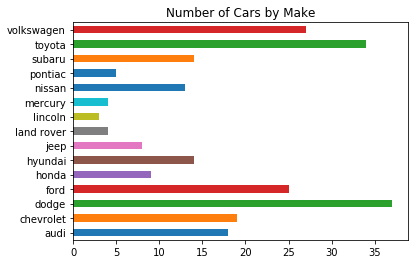

In [4]:
# Pandas
(mpg['manufacturer']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of Cars by Make')
)

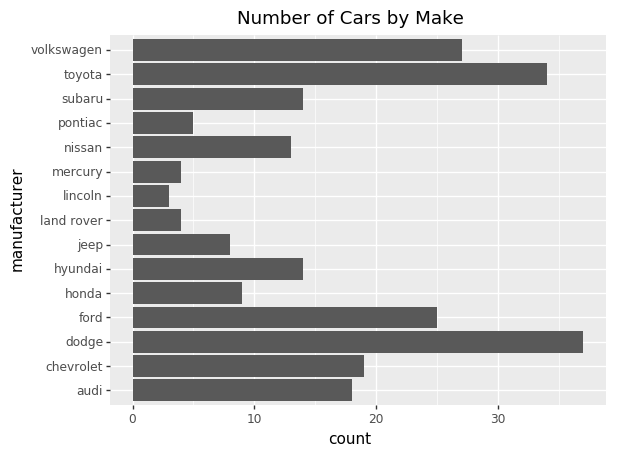

<ggplot: (84451390114)>

In [5]:
# Plotnine (ggplot2 clone)
(ggplot(mpg) + 
   aes(x='manufacturer') +
   geom_bar(size=20) + 
   coord_flip() +
   ggtitle('Number of Cars by Make')
)

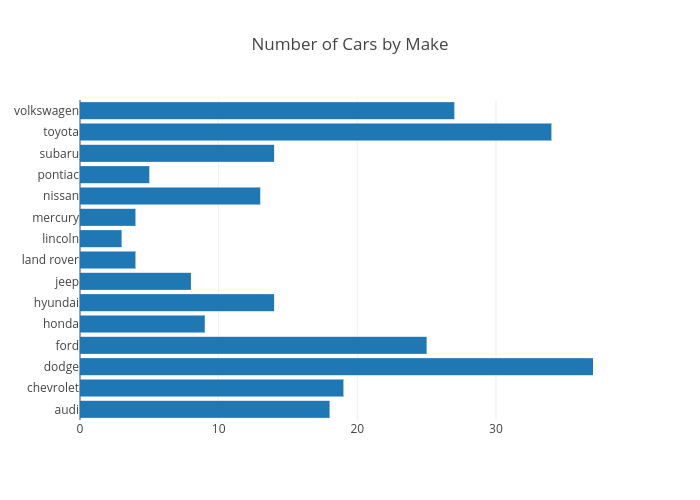

In [6]:
mpgGrouped = mpg.groupby('manufacturer').size()
fig = {
    'data' : [{
        'type' : 'bar',
        'x' : mpgGrouped.values.tolist(),
        'y' : mpgGrouped.index.tolist(),
        'orientation' : 'h'
        
    }],
    'layout' : {
        'title' : 'Number of Cars by Make'
    }
}

py.image.ishow(fig)

## Scatter Plot

[Text(0,0.5,'Highway MPG'),
 Text(0.5,0,'Engine Displacement in Liters'),
 Text(0.5,1,'Engine Displacement in Liters vs Highway MPG')]

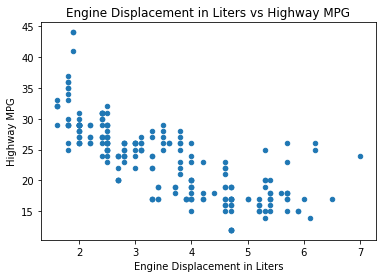

In [7]:
(mpg
 .plot
 .scatter(x='displ', y='hwy')
 .set(title='Engine Displacement in Liters vs Highway MPG',
      xlabel='Engine Displacement in Liters',
      ylabel='Highway MPG'))

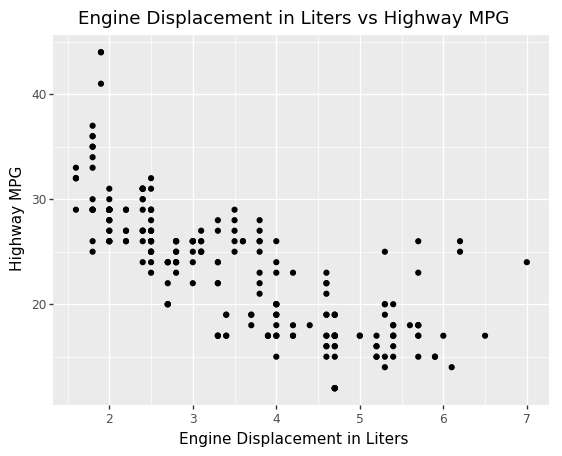

<ggplot: (-9223371952403327379)>

In [8]:
(ggplot(mpg) +
    aes(x = 'displ', y = 'hwy') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

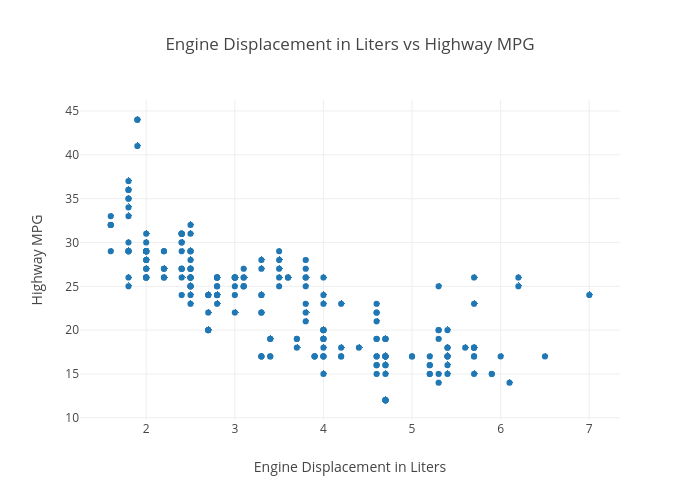

In [9]:
fig = {
    'data' : [{
        'type' : 'scatter',
        'mode' : 'markers',
        'x' : mpg.displ,
        'y' : mpg.hwy        
    }],
    'layout' : {
        'title' : 'Engine Displacement in Liters vs Highway MPG',
        'xaxis' : {
            'title' : 'Engine Displacement in Liters'
        },
        'yaxis' : {
            'title' : 'Highway MPG'
        }
    }
}
py.image.ishow(fig)

## Scatter Plot, Faceted with Color

Text(0,0.5,'Highway MPG')

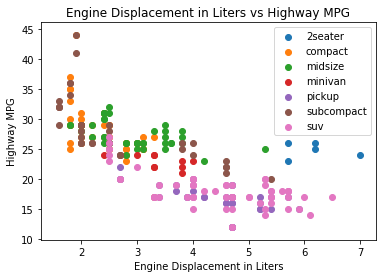

In [10]:
fig, ax = plt.subplots()
for c, df in mpg.groupby('class'):
    ax.scatter(df['displ'], df['hwy'], label=c)
ax.legend()
ax.set_title('Engine Displacement in Liters vs Highway MPG')
ax.set_xlabel('Engine Displacement in Liters')
ax.set_ylabel('Highway MPG')

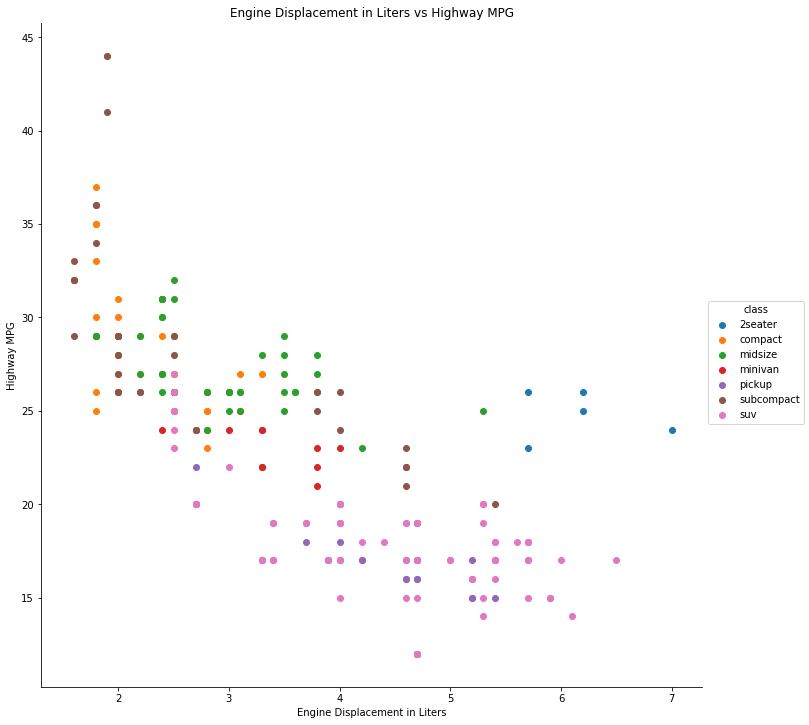

In [11]:
(sns
 .FacetGrid(mpg, hue='class', size=10)
 .map(plt.scatter, 'displ', 'hwy')
 .add_legend()
 .set(
    title='Engine Displacement in Liters vs Highway MPG',
    xlabel='Engine Displacement in Liters',
    ylabel='Highway MPG'
))

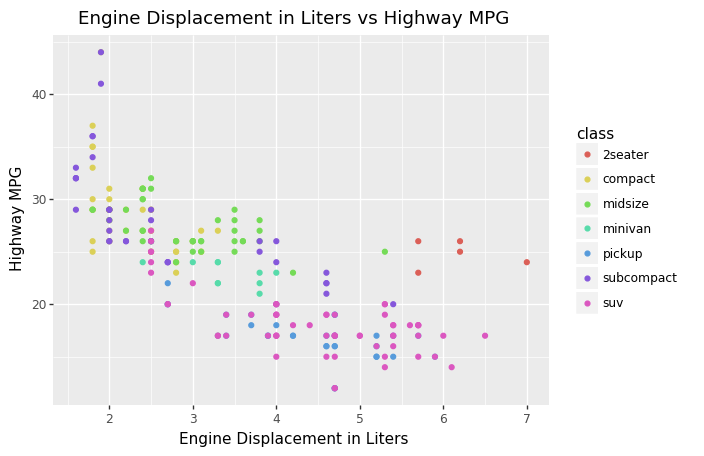

<ggplot: (84453937065)>

In [12]:
(ggplot(mpg) + 
    aes(x = 'displ', y = 'hwy', color = 'class') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

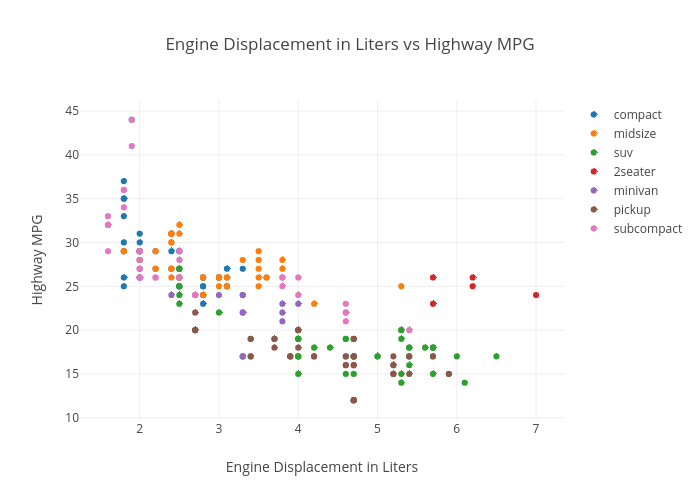

In [13]:
traces = []
for cls in mpg['class'].unique():
    traces.append({
        'type' : 'scatter',
        'mode' : 'markers',
        'x' : mpg.displ[mpg['class'] == cls],
        'y' : mpg.hwy[mpg['class'] == cls],
        'name' : cls
    })
    
fig = {
    'data' : traces,
    'layout' : {
        'title' : 'Engine Displacement in Liters vs Highway MPG',
        'xaxis' : {
            'title' : 'Engine Displacement in Liters',
        },
        'yaxis' : {
            'title' : 'Highway MPG'
        }
    }
}
py.image.ishow(fig)